In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bread basket.csv")
data

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
data.shape

(20507, 5)

In [5]:
data.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [9]:
data['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [51]:
# reformat date time

data['date_time'] = pd.to_datetime(data['date_time'], format = "%d-%m-%Y %H:%M")

In [52]:
data['date_time'].dtype

dtype('<M8[ns]')

In [53]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [54]:
# jumlah unique customer

data['Transaction'].nunique()

9465

In [55]:
# extract date
data['date'] = data['date_time'].dt.date

# extract time
data['time'] = data['date_time'].dt.time

# extract month and replace with text
data['month'] =  data['date_time'].dt.month
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                      ('January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December'))

In [56]:
# extract hour 
data['hour'] = data['date_time'].dt.hour

In [57]:
hour_unique = data['hour'].unique()
sorted(hour_unique)

[1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [58]:
# replace hour with character
hour_in_num = (1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
hour_in_obj = ('1-2', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
data['hour'] = data['hour'].replace(hour_in_num, hour_in_obj)

In [59]:
# Extracting weekday and replacing it with chraracter
data['weekday'] = data['date_time'].dt.weekday
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [60]:
# drop date_time var
data.drop('date_time', axis=1, inplace=True)

In [61]:
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [62]:
# cleaning Item  var
data['Item'] = data['Item'].str.strip()
data['Item'] = data['Item'].str.lower()

In [63]:
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


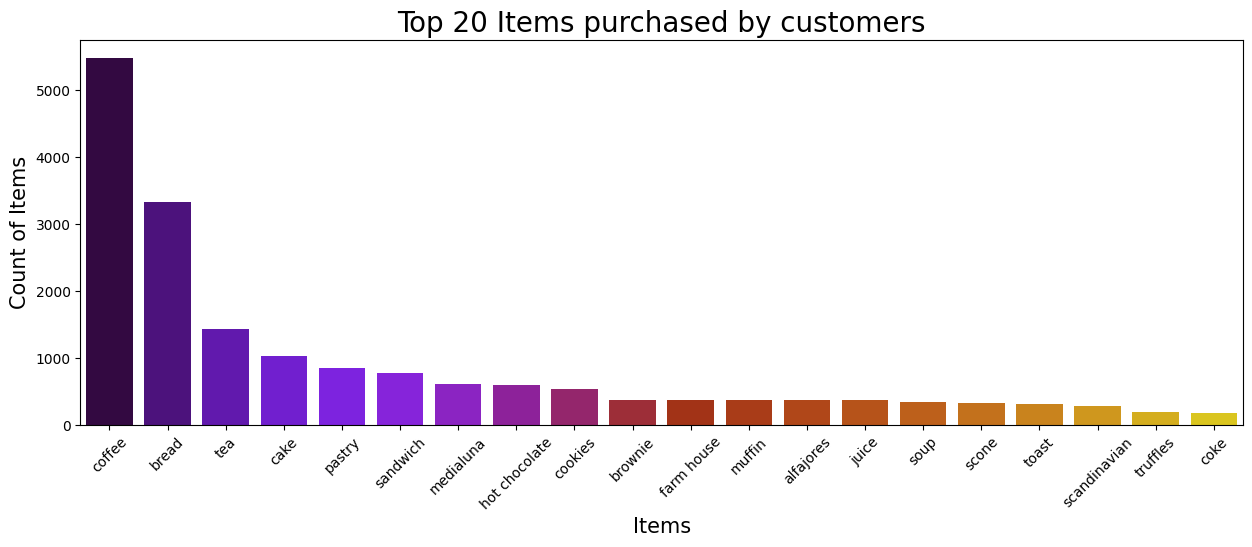

In [64]:
# item terlaris

plt.figure(figsize=(15,5))
sns.barplot(x = data.Item.value_counts().head(20).index, y = data.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'black', size = 20)
plt.show()

In [65]:
data['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April'], dtype=object)

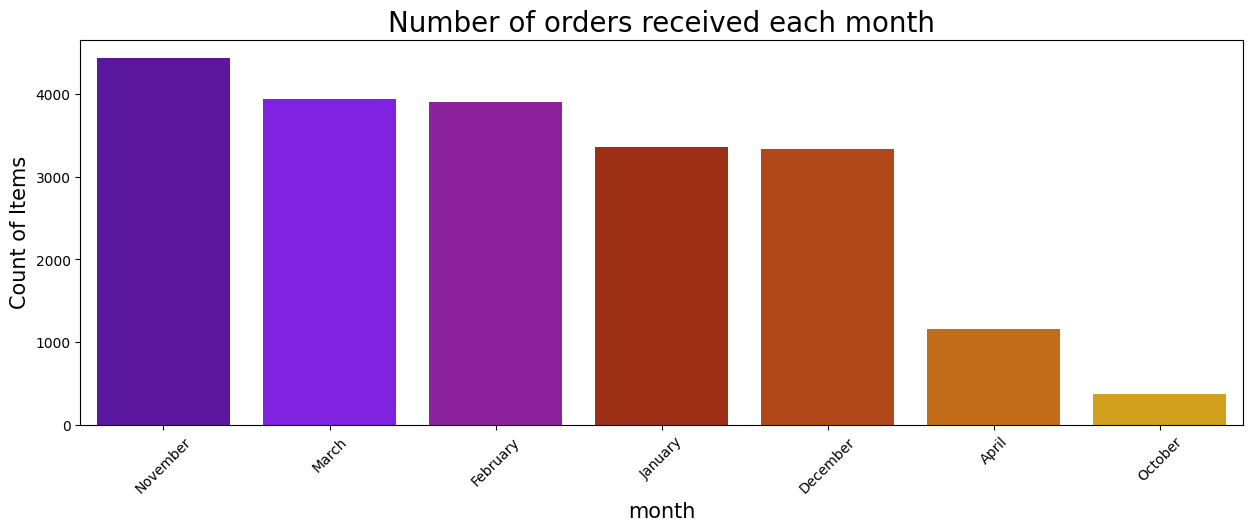

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.month.value_counts().index, y = data.month.value_counts().values, palette = 'gnuplot')
plt.xlabel('month', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Number of orders received each month', color = 'black', size = 20)
plt.show()

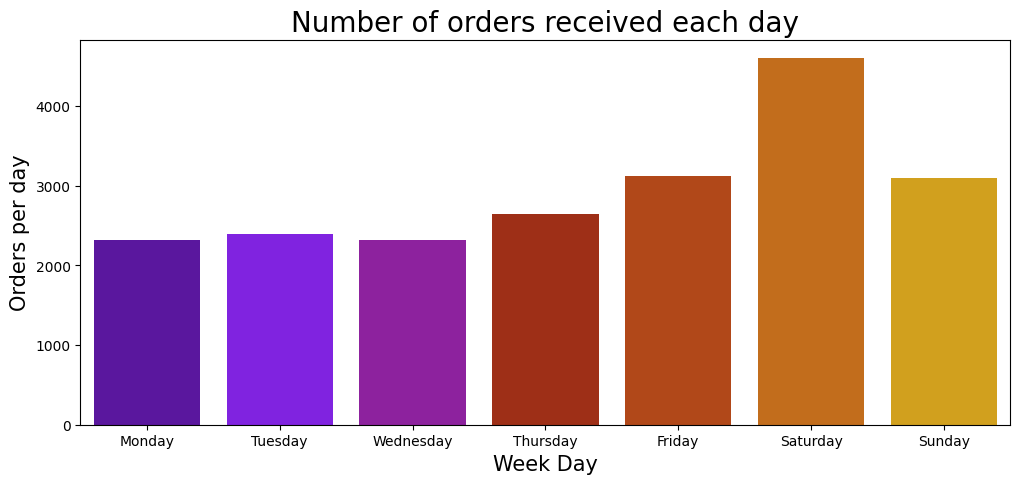

In [67]:
weekTran = data.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction", palette = 'gnuplot')
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'black', size = 20)
plt.show()


plt.show()

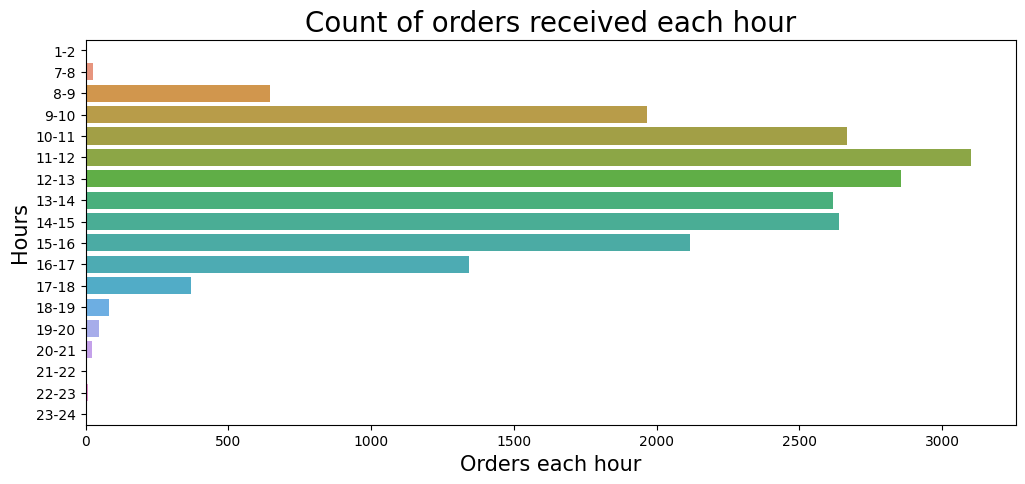

In [68]:
hourTran = data.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
#hourTran.loc[:,"hourorder"] = []
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'black', size = 20)
plt.show()

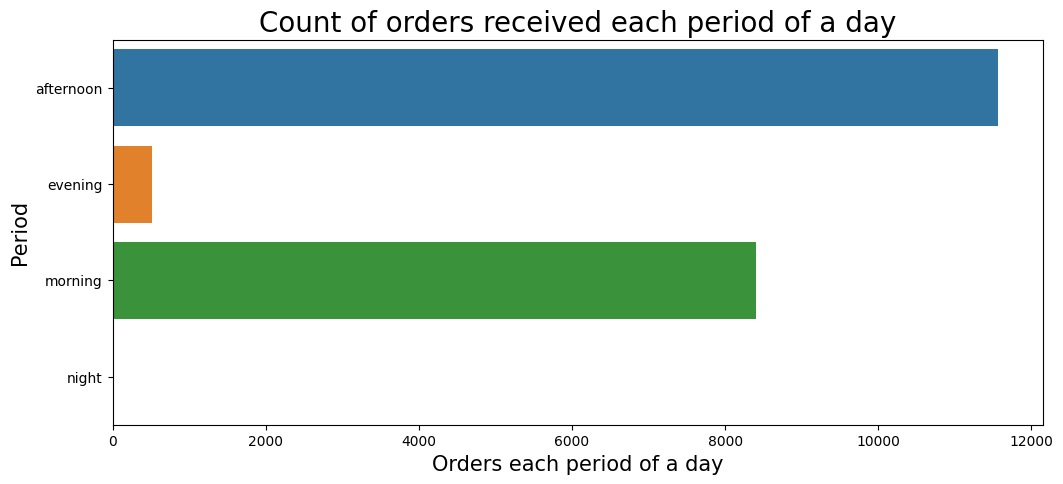

In [69]:
dayTran = data.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'black', size = 20)
plt.show()

In [70]:
dates = data.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, data[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-11-05,275,Saturday
275,2016-11-12,221,Saturday
496,2016-11-19,209,Saturday
705,2017-01-28,237,Saturday
942,2017-02-04,292,Saturday
1234,2017-02-18,227,Saturday
1461,2017-03-04,257,Saturday
1718,2017-03-11,203,Saturday
1921,2017-03-25,246,Saturday
2167,2017-04-08,205,Saturday


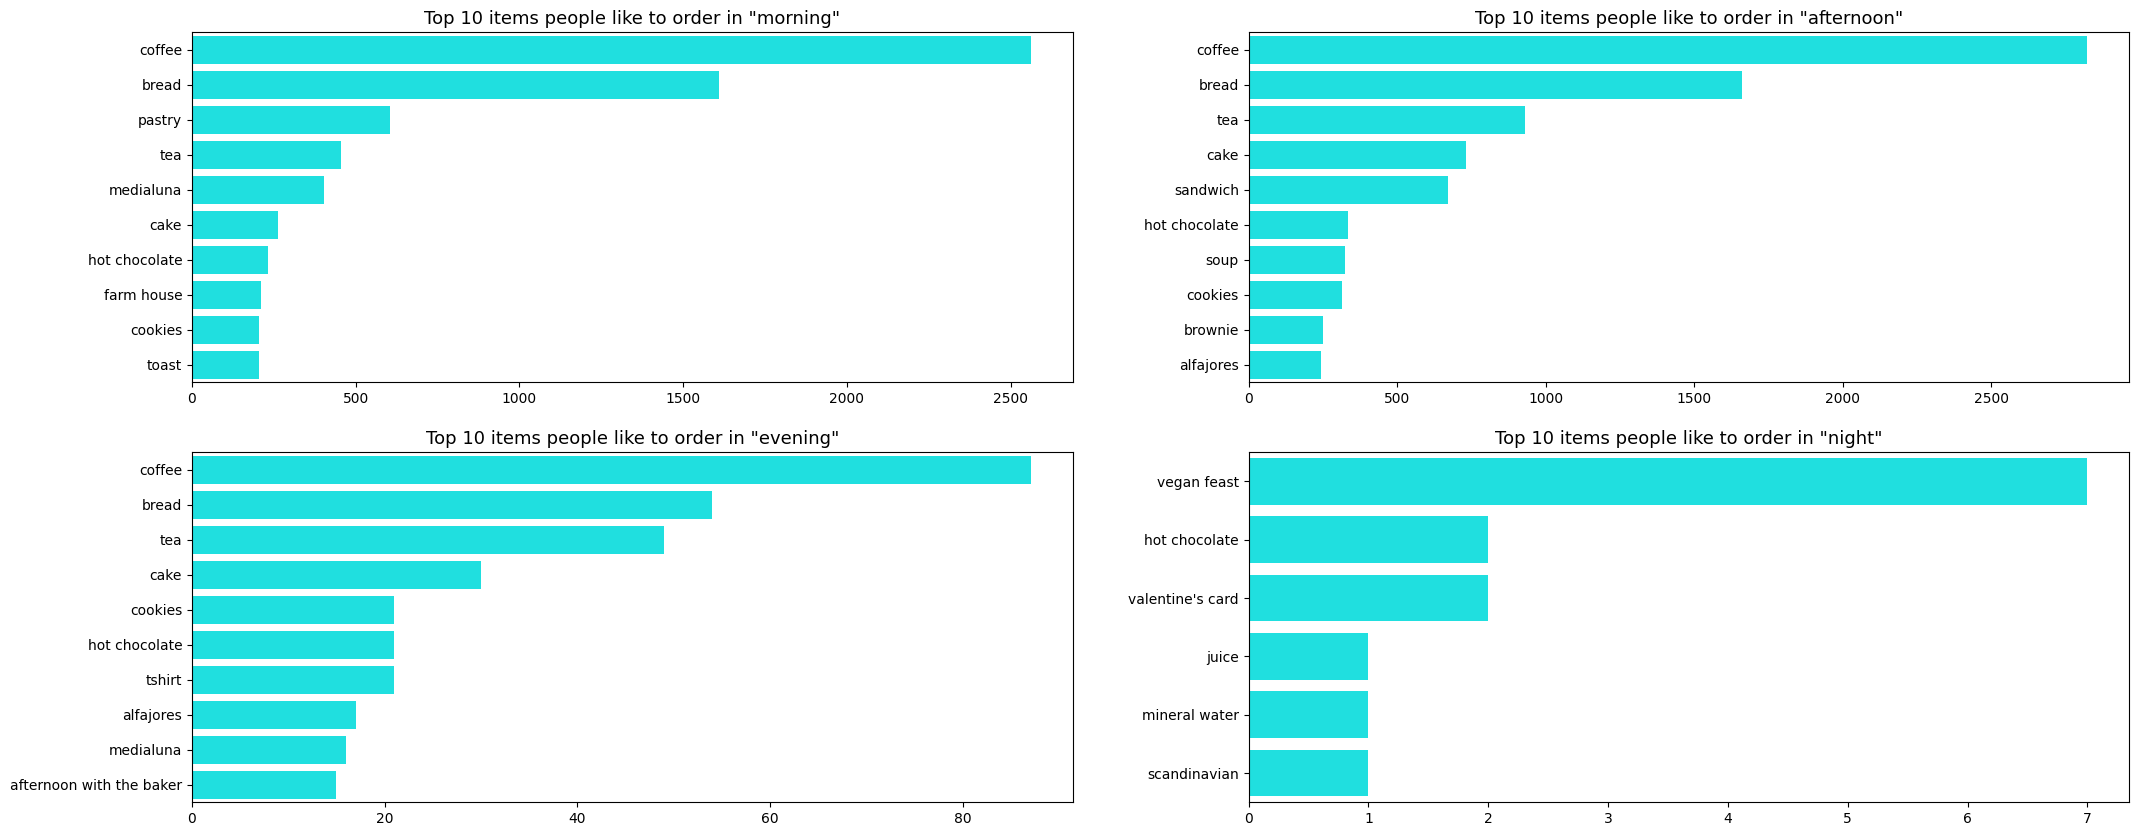

In [71]:
data = data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(25,10))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='cyan')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

In [72]:
data = data[['Transaction', 'Item']].copy()
data

,Transaction,Item
222,7,vegan feast
217,2,hot chocolate
221,2,valentine's card
218,1,juice
219,1,mineral water
...,...,...
41,1,hack the stack
55,1,mortimer
60,1,olum & polenta
64,1,polenta


In [73]:
from mlxtend.frequent_patterns import association_rules, apriori

In [74]:
transactions_str = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,adjustment,1
1,1,bacon,1
2,1,baguette,1
3,1,bare popcorn,1
4,1,brioche and salami,1
...,...,...,...
213,930,tea,1
214,1610,bread,1
215,1661,bread,1
216,2561,coffee,1


In [75]:
# if transactions_str['Count'] == 2:
#transactions_str = transactions_str.where(transactions_str !=2, other=1)

In [76]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [77]:
my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
my_basket.shape

(82, 94)

In [79]:
my_basket = my_basket.astype('int32')
my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,2,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# # making a function which returns 0 or 1
# # 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# using 'apriori algorithm' with min_support=0.015 (1.5% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset

frequent_items = apriori(my_basket_sets, min_support = 0.015, use_colnames = True)
frequent_items.sort_values('support', ascending=False).head(0)
frequent_items

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036585,(afternoon with the baker)
1,0.036585,(alfajores)
2,0.024390,(argentina night)
3,0.036585,(art tray)
4,0.036585,(baguette)
...,...,...
405,0.024390,"(kids biscuit, caramel bites, brioche and sala..."
406,0.024390,"(kids biscuit, caramel bites, coffee granules,..."
407,0.024390,"(kids biscuit, coffee granules, brioche and sa..."
408,0.024390,"(kids biscuit, caramel bites, coffee granules,..."


In [82]:
# nmaking the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(argentina night),(dulce de leche),0.02439,0.036585,0.02439,1.0,27.333333,0.023498,inf
4340,"(kids biscuit, coffee granules)","(raspberry shortbread sandwich, caramel bites,...",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
4350,"(coffee granules, mortimer)","(raspberry shortbread sandwich, kids biscuit, ...",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
4349,"(raspberry shortbread sandwich, coffee granules)","(kids biscuit, caramel bites, brioche and sala...",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
4348,"(coffee granules, brioche and salami)","(raspberry shortbread sandwich, kids biscuit, ...",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
...,...,...,...,...,...,...,...,...,...
508,(vegan feast),"(coffee granules, chicken stew)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
75,(vegan feast),(christmas common),0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
208,(mineral water),"(bare popcorn, coffee granules)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
616,(vegan feast),"(valentine's card, dulce de leche)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122


In [83]:
# arranging the data from highest to lowest with based on 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(argentina night),(dulce de leche),0.02439,0.036585,0.02439,1.0,27.333333,0.023498,inf
402,"(kids biscuit, caramel bites)",(mighty protein),0.02439,0.036585,0.02439,1.0,27.333333,0.023498,inf
363,(caramel bites),"(cherry me dried fruit, mighty protein)",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
392,"(mortimer, coffee granules)",(caramel bites),0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
393,(caramel bites),"(mortimer, coffee granules)",0.02439,0.024390,0.02439,1.0,41.000000,0.023795,inf
...,...,...,...,...,...,...,...,...,...
184,(vegan feast),"(valentine's card, argentina night)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
514,(vegan feast),"(valentine's card, chicken stew)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
664,(vegan feast),"(valentine's card, panatone)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122
734,(mineral water),"(bare popcorn, chocolates, coffee granules)",0.04878,0.024390,0.02439,0.5,20.500000,0.023200,1.95122


In [84]:
print('Number of association: {}'.format(rules.shape[0]))

Number of association: 6552


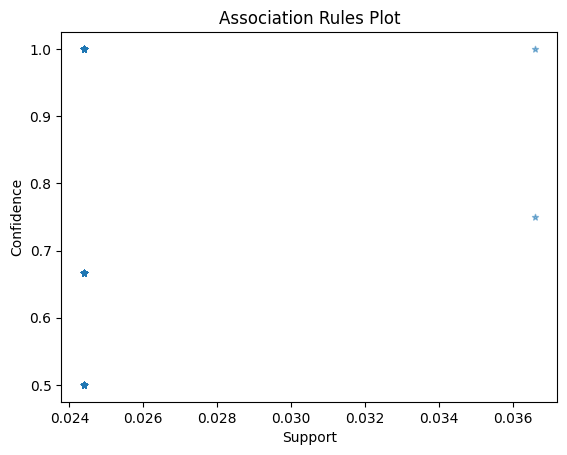

In [100]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules Plot")
plt.show()